<h1 align="center">CP640 Machine Learning - Group Project 3<h/1>

<h3 align="center">Project title: Sentiment E-commerce Insights Analysis for Reviews on Women’s Clothing</h3>

***
## Student information
 - Team lead: Gia Phat Huynh, 235838900
 - Team members:
     - Thai Son Truong, 235841520
     - Sohail Ahmed Mohammed, 235807480
     - Ebad Shahid, 235841420
     - Naveed Munsif, 235827540

## I. Load data from csv file

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import nltk
import re

In [2]:
df = pd.read_csv('ML Assignment/Womens Clothing E-Commerce Reviews.csv', index_col=False)

#Display csv info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


This dataset has 23486 entries and 11 columns. Some of the entries are missing like Title, Division Name, Department Name, and Class Name.

In [3]:
#Display data in the csv file
display(df)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [4]:
#Data description in the dataframe
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


## II. Explore the relationship between review text and rating

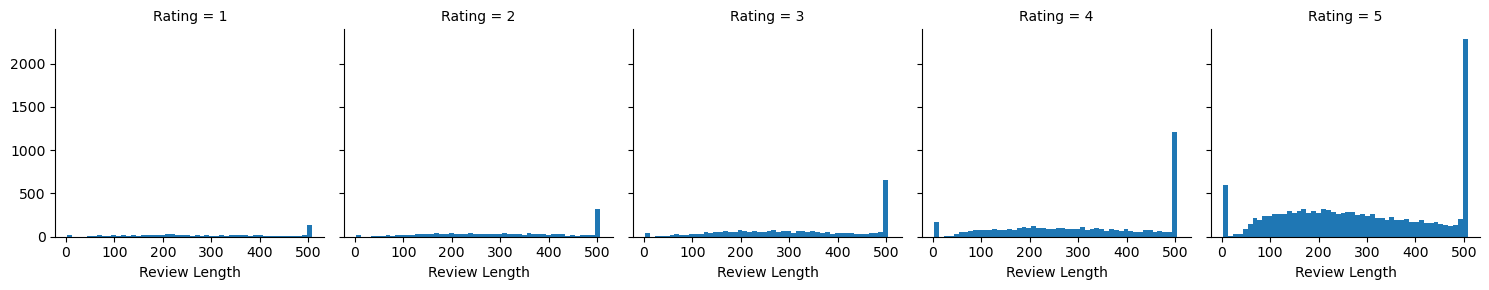

In [5]:
# Ignore future warning from seaborn library
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

#Exploring the relationship between rating and review text
df['Review Text']=df['Review Text'].astype(str)
df['Review Length']=df['Review Text'].apply(len)
g = sns.FacetGrid(data=df, col='Rating')
g.map(plt.hist, 'Review Length', bins=50)

Verdict: From the above chart, it indicates that the users gave 5 rating oftenly. There are less number of users who gave rating 1 and 2.

<Axes: xlabel='Rating', ylabel='Review Length'>

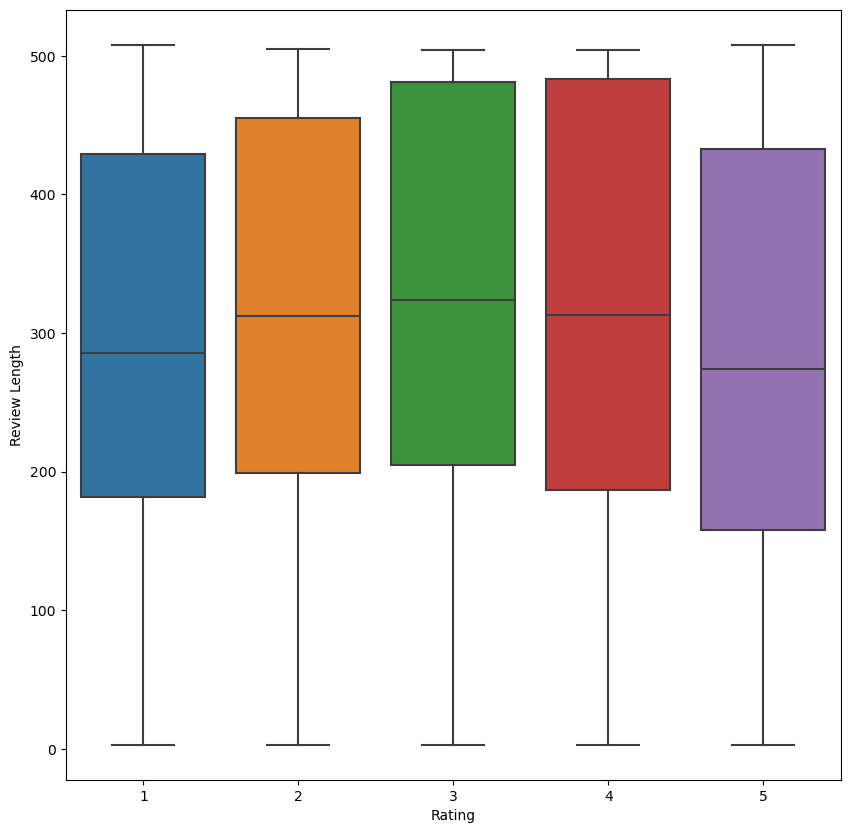

In [6]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Rating', y='Review Length', data=df)

Verdict: Compared to other ratings, the rating 3 and 4 have more text length in review

<Axes: xlabel='Age'>

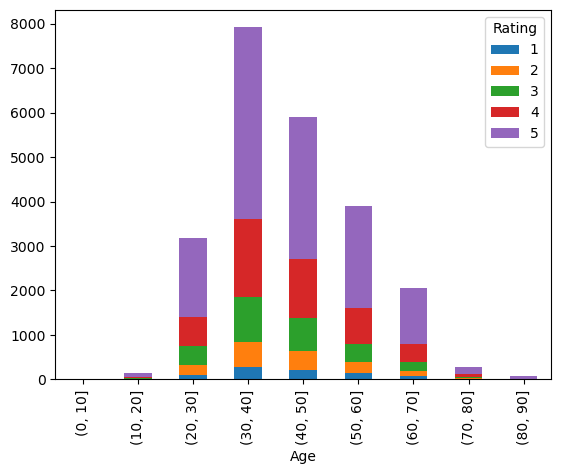

In [7]:
df.groupby(['Rating', pd.cut(df['Age'], np.arange(0,100,10))], observed=False)\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

Verdict: The barplot above indicates that individuals in the 10-20 age group provided lower ratings, which is expected. Teenagers in this age range typically exhibit less interest in online shopping and reviews. Conversely, the 30-40 age group gave the highest number of 5 ratings compared to other age groups, signifying their active participation in providing reviews. This demographic contributed the majority of reviews and ratings. Conversely, individuals above 70 demonstrated a lack of interest in online shopping matters.

<Axes: xlabel='Age'>

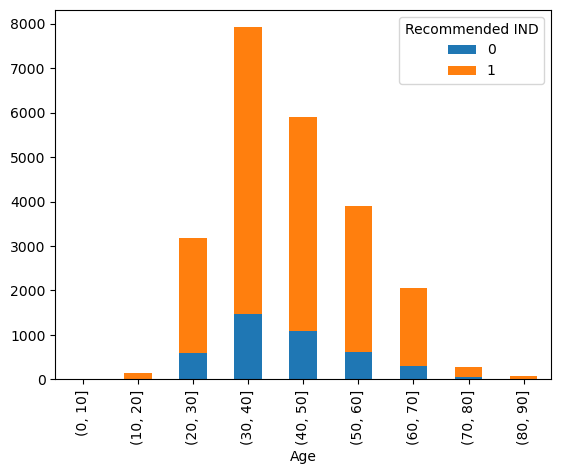

In [8]:
df.groupby(['Recommended IND', pd.cut(df['Age'], np.arange(0,100,10))], observed=False)\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

Verdict: he bar chart above suggests that feedback for the product primarily comes from individuals aged between 20 and 70. Specifically, the 30-40 age group is notably engaged in offering feedback for our product when compared to other age demographics.

## III. Explore the data insight of "Review text"

<Axes: xlabel='Word', ylabel='Frequency'>

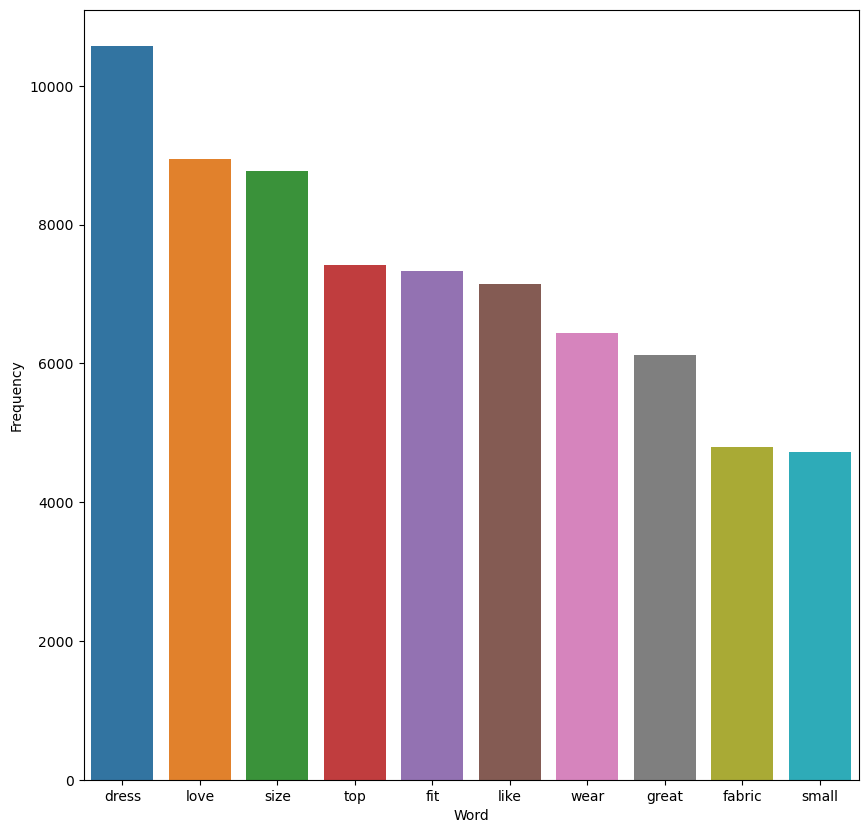

In [9]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words 
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS 
#import nltk
#nltk.download('stopwords')
#import nltk
#nltk.download('punkt')

top_N = 100

#.str.lower() - Converts all the text in the 'Review Text' column to lowercase
#.str.cat(sep=' ') - Concatenates all the text in the 'Review Text' column into a single string, where each review is separated by a space
a = df['Review Text'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en')) #Creates a list of stop words using the get_stop_words function from the stop_words library for English       
nltk_words = list(stopwords.words('english')) #Creates another list of stop words using the stopwords.words function from the NLTK library for English  
#Combined list contains all the stop words from both sources (stop_words and nltk_words).
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
without_number_data = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(without_number_data)
result = pd.DataFrame(word_dist.most_common(top_N), columns = ['Word', 'Frequency'])

plt.figure(figsize=(10,10))
##list top 10 words occurs frequently in the review text
sns.barplot(x = "Word",y = "Frequency", data = result.head(10))

Verdict: The bar plot above illustrates the word frequency in the 'Review Text' column. The term "dress" is the most frequently occurring word in the text. Following closely, the word "love" holds the second position, suggesting a positive sentiment in the reviews.

Assume that the sentiment value > 0  is Positive review, the sentiment value = 0 is Neutral review and the sentiment value < 0 is Nagative value. We use word cloud to explore the "Review text" column and display most oftenly used words in each group based on the polarity value.

In [10]:
from textblob import TextBlob

bloblist_desc = list()

df_review_str = df['Review Text'].astype(str)
for row in df_review_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['Review','Sentiment','Polarity'])
 
def f(df_polarity_desc):
    if df_polarity_desc['Sentiment'] > 0:
        val = "Positive Review"
    elif df_polarity_desc['Sentiment'] == 0:
        val = "Neutral Review"
    else:
        val = "Negative Review"
    return val

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

positive_reviews = df_polarity_desc[df_polarity_desc['Sentiment_Type'] == 'Positive Review']
neutral_reviews = df_polarity_desc[df_polarity_desc['Sentiment_Type'] == 'Neutral Review']
negative_reviews = df_polarity_desc[df_polarity_desc['Sentiment_Type'] == 'Negative Review']

def wordCloud(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wordCloud = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wordCloud.generate(' '.join(data))
    plt.imshow(wordCloud)
    plt.axis('off')

The wordcloud for positive reviews


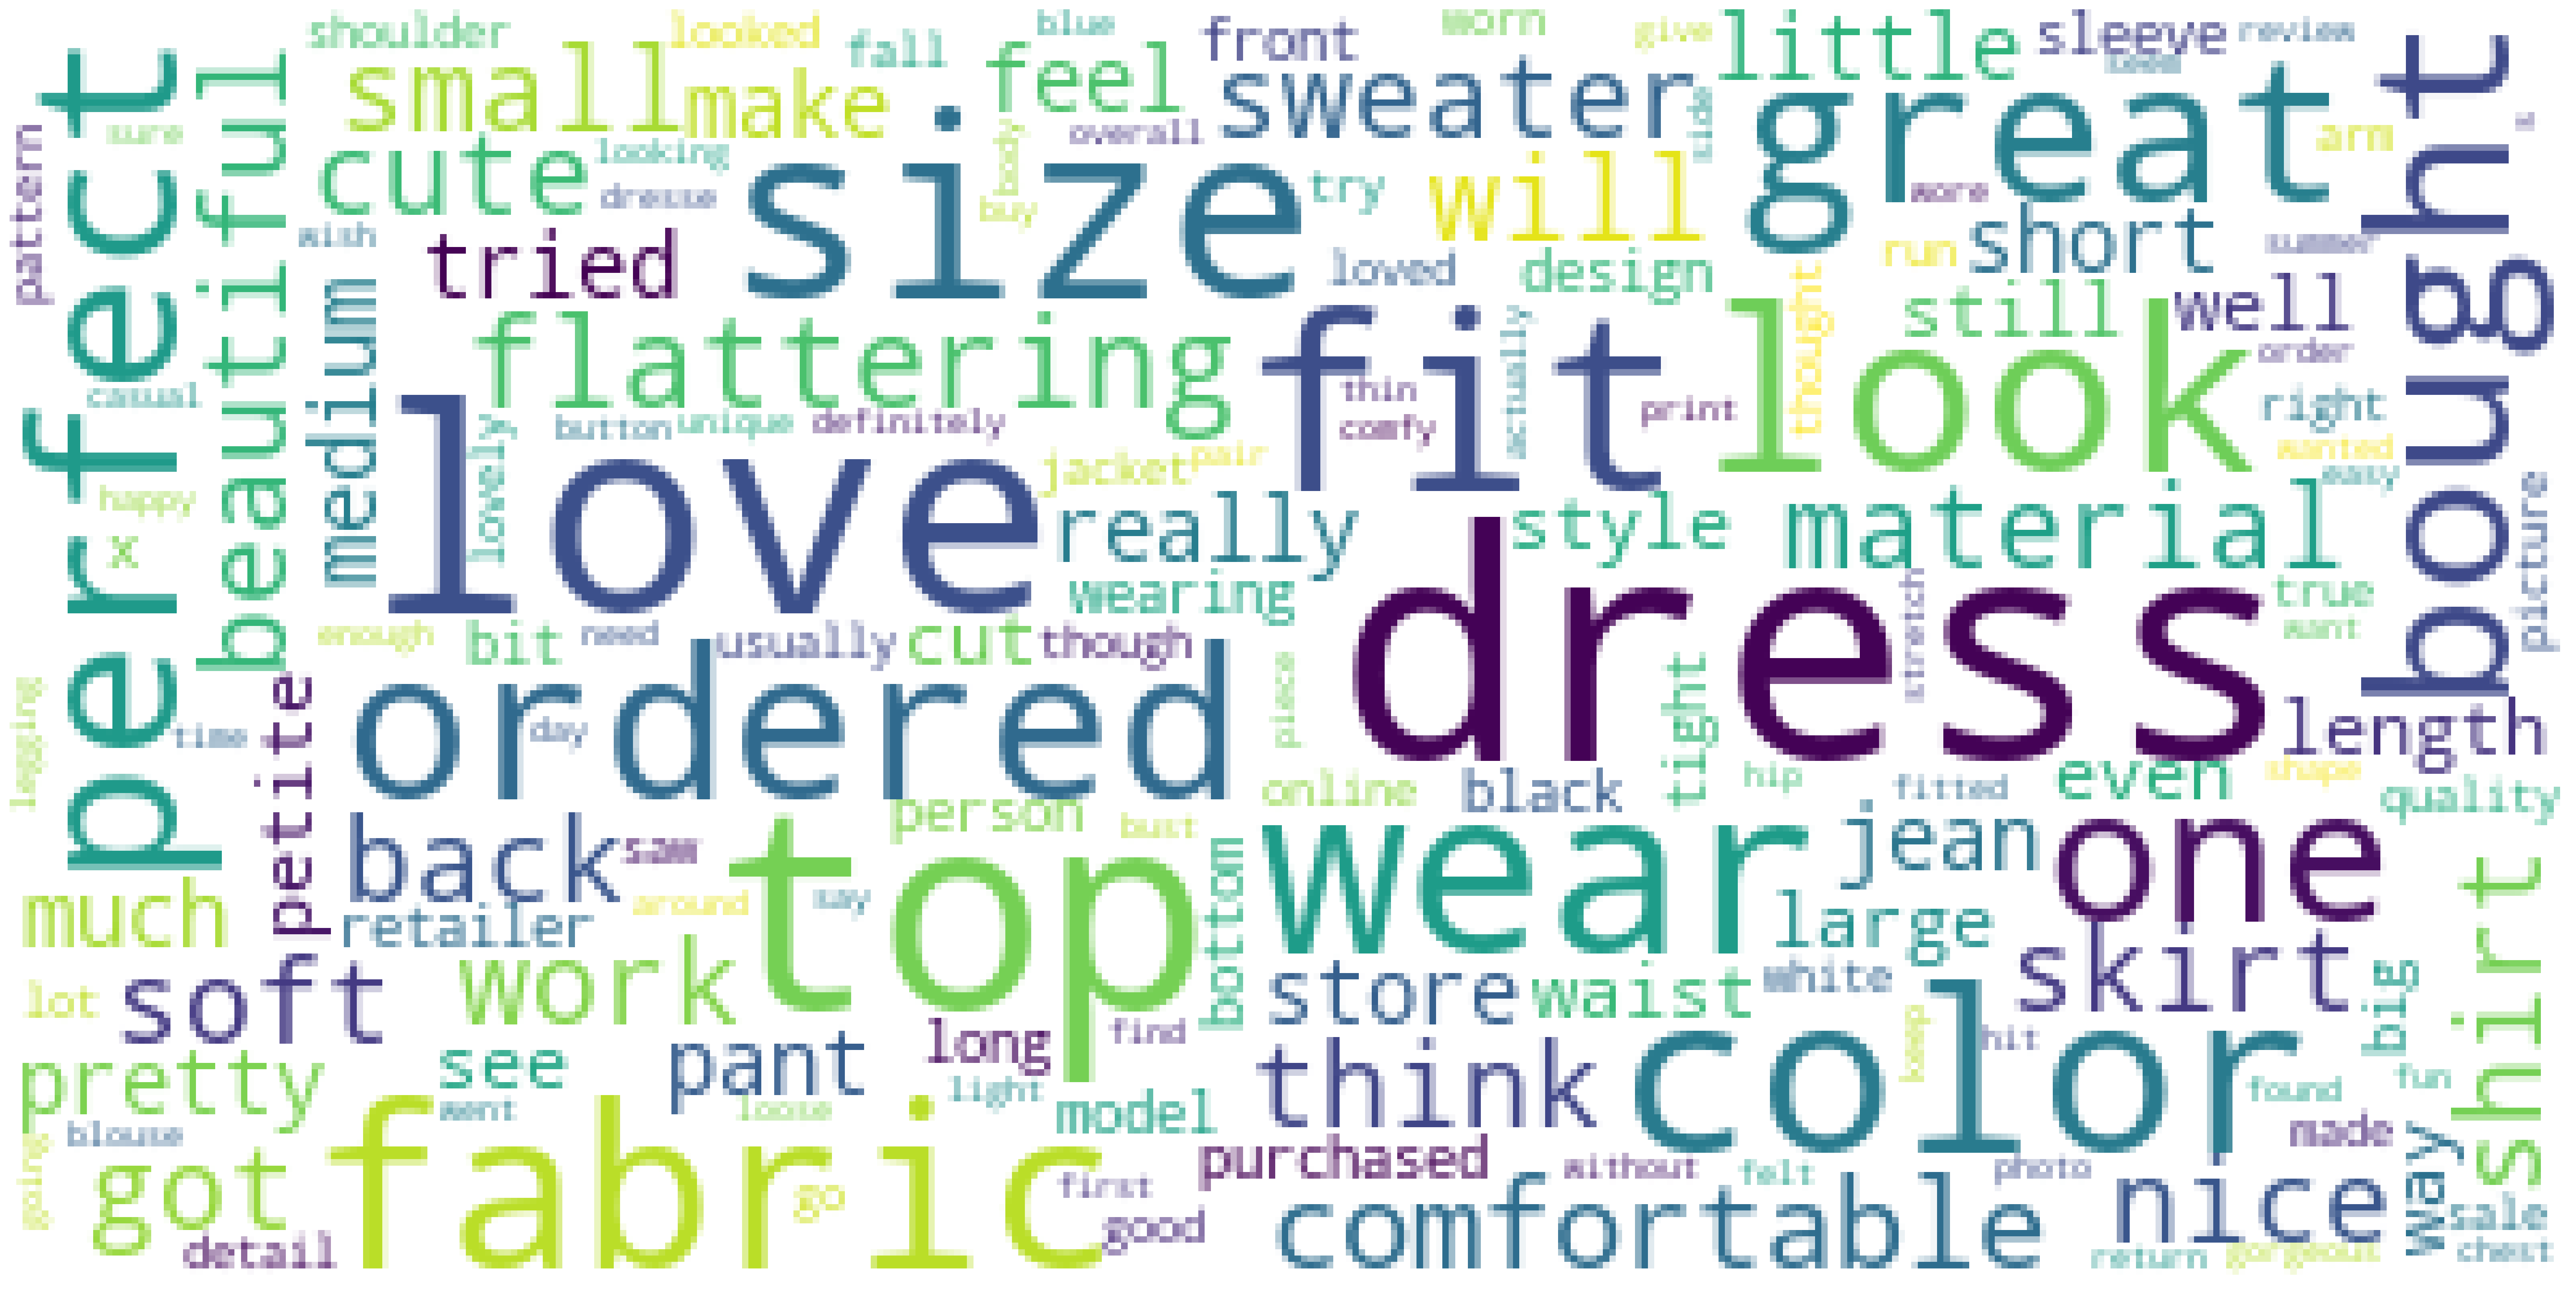

In [11]:
print('The wordcloud for positive reviews')
wordCloud(positive_reviews['Review'],'white','Most Used Words')

The wordcloud for neutral reviews


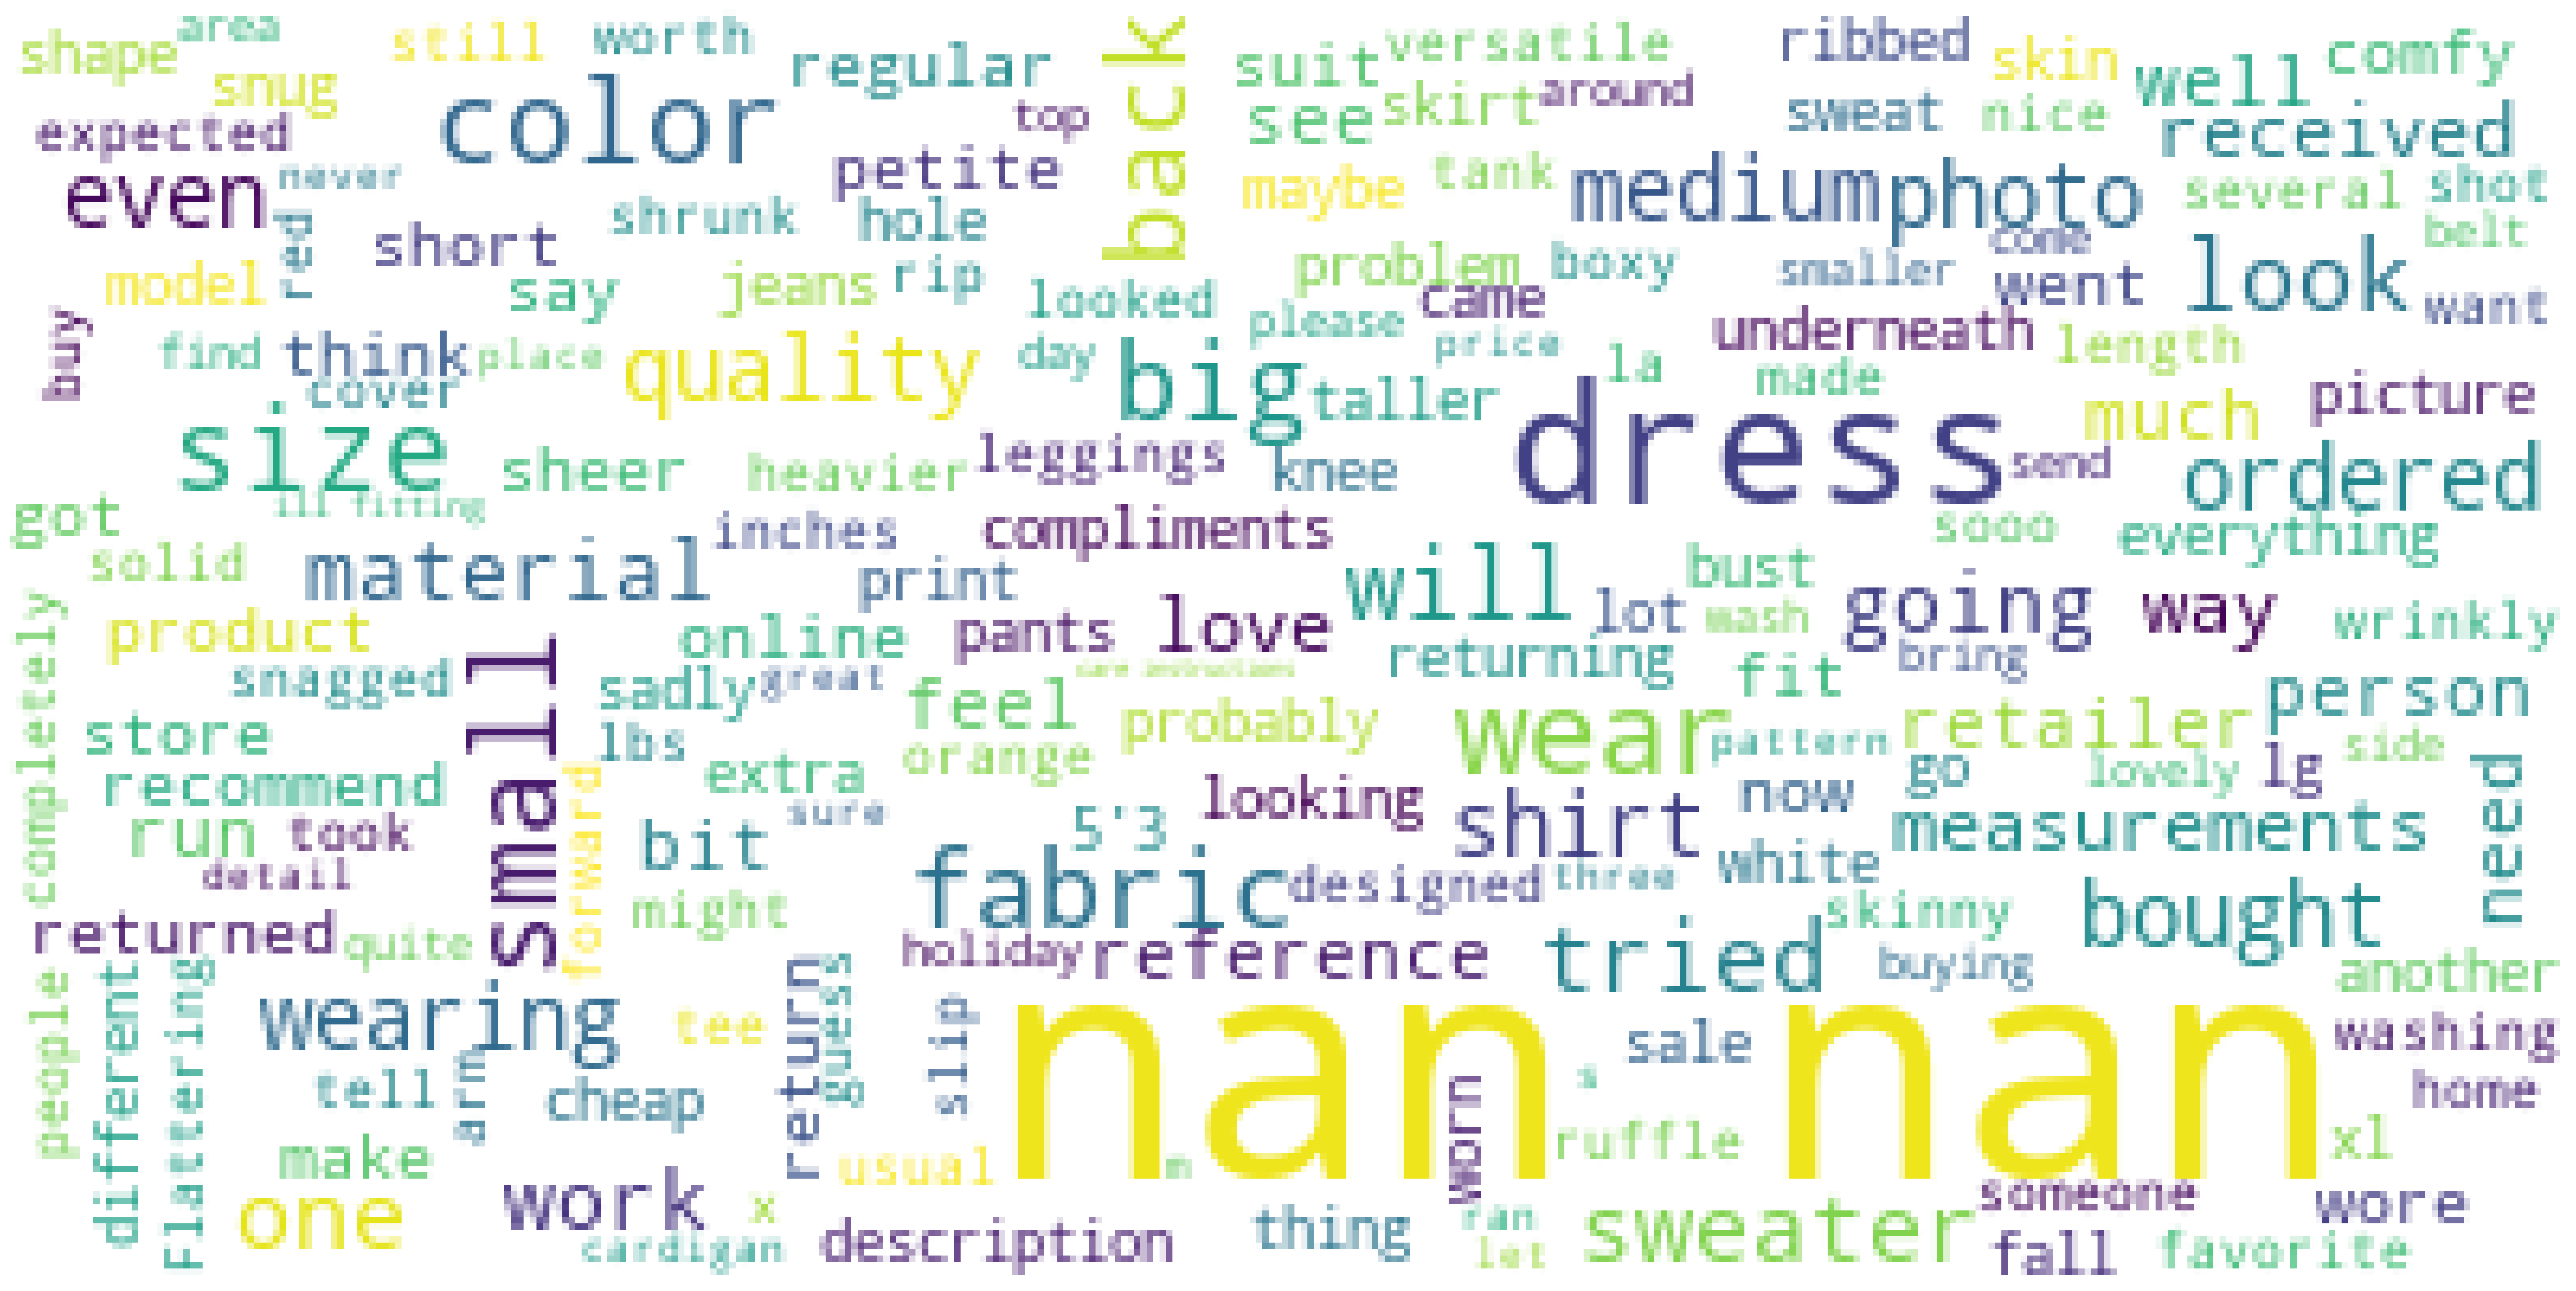

In [12]:
print('The wordcloud for neutral reviews')
wordCloud(neutral_reviews['Review'],'white','Most Used Words')

The wordcloud for negative reviews


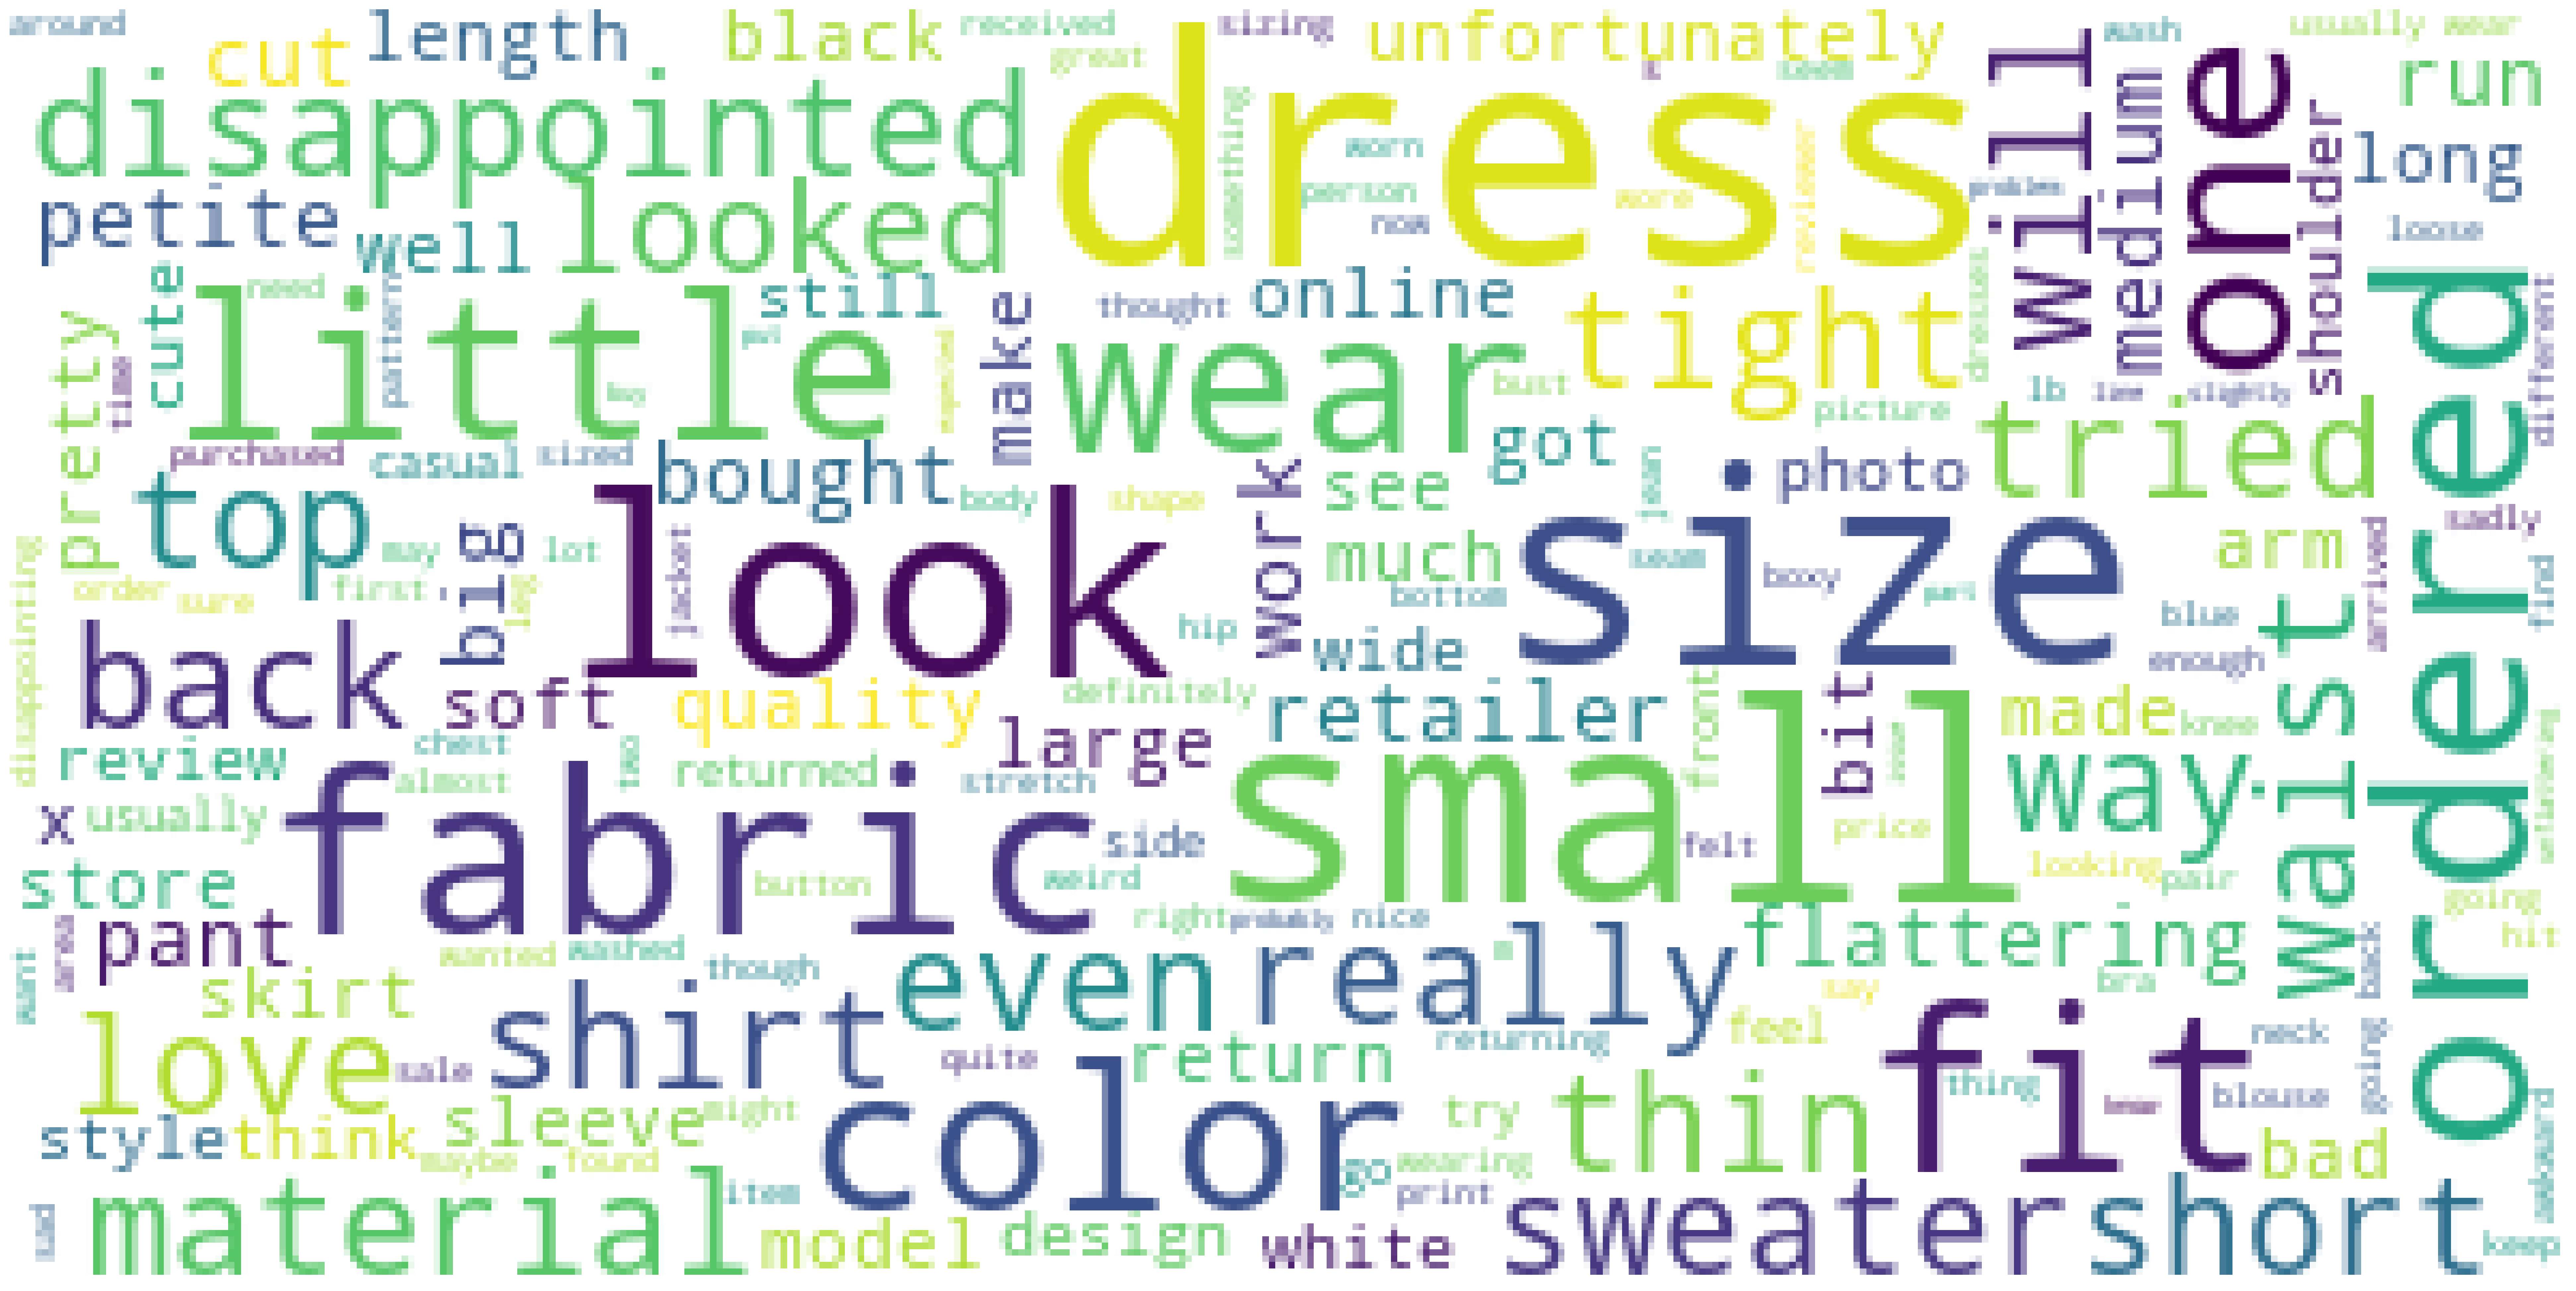

In [13]:
print('The wordcloud for negative reviews')
wordCloud(negative_reviews['Review'],'white','Most Used Words')

## IV. Build a NB model to predict rating from the provided review

### a. Data preprocessing

In [14]:
import string

#Define a function to remove the punctuations, converts word into lower case, and remove the stopwords from the sentence
def text_processing(review):
    is_punc = [word for word in review if word not in string.punctuation]
    nopunc = ''.join(is_punc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

df['Review Text'].head(10).apply(text_processing)

0    [Absolutely, wonderful, silky, sexy, comfortable]
1    [Love, dress, sooo, pretty, happened, find, st...
2    [high, hopes, dress, really, wanted, work, ini...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flattering, due, adjustable, front, ti...
5    [love, tracy, reese, dresses, one, petite, 5, ...
6    [aded, basket, hte, last, mintue, see, would, ...
7    [ordered, carbon, store, pick, ton, stuff, alw...
8    [love, dress, usually, get, xs, runs, little, ...
9    [Im, 55, 125, lbs, ordered, petite, make, sure...
Name: Review Text, dtype: object

Given that the data type of the "Review text" column is a string, a method is required to transform it into a numerical format.

Our "Review text" column is preprocessed as a token, devoid of punctuations and stopwords. To achieve this transformation, we will employ Scikit-learn’s CountVectorizer, converting the text collection into a matrix representing token counts.

Visualizing the outcome, the resulting matrix can be envisioned as a two-dimensional grid. Each row corresponds to a unique word, and each column represents an individual review.

In [15]:
#Remove neutral review
rating_class = df[(df['Rating'] == 1) | (df['Rating'] == 2) | (df['Rating'] == 4) | (df['Rating'] == 5)]
X = rating_class['Review Text']
y = rating_class['Rating']

display(X, y)

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
5        I love tracy reese dresses, but this one is no...
                               ...                        
23478    I was surprised at the positive reviews for th...
23479    So i wasn't sure about ordering this skirt bec...
23480                                                  nan
23481    I was very happy to snag this dress at such a ...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 20615, dtype: object

0        4
1        5
3        5
4        5
5        2
        ..
23478    1
23479    5
23480    5
23481    5
23485    5
Name: Rating, Length: 20615, dtype: int64

### b. Training and test split

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

dt_transformer = CountVectorizer(analyzer=text_processing).fit(X)

X_review = dt_transformer.transform(X)

#Randomly split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size = 0.3, random_state = 42)

### c. Build Multinomial Naive Bayes model

In [17]:
#Note: we use MultinomialNB to work with text data instead of GaussianNB, which supports continous features

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
hist_nb = nb.fit(X_train, y_train)

#Predict
y_pred_nb = nb.predict(X_test)

### d. Naive Bayes model evaluation

In [20]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

#X,y
#Calculate accuracy score
accuracy = round(accuracy_score(y_test, y_pred_nb) * 100, 2)
print("Accuracy: %", accuracy)
print("--" * 20)

#Calculate precision score
precision = round(precision_score(y_test, y_pred_nb, average = 'weighted') * 100, 2)
print("Precision score: %", precision)
print("--" * 20)

#Calculate recall score
recall = round(recall_score(y_test, y_pred_nb, average = 'weighted') * 100, 2)
print("Recall score: %", recall)
print("--" * 20)

#Calculate F1 score
f1_nb = round(f1_score(y_test, y_pred_nb, average = 'weighted') * 100, 2)
print("F1_score: %", f1_nb)
print("--" * 20)

#Print classification report
print("Classification report: \n")
cr = classification_report(y_test, y_pred_nb)
print(cr)

Accuracy: % 69.75
----------------------------------------
Precision score: % 66.54
----------------------------------------
Recall score: % 69.75
----------------------------------------
F1_score: % 66.65
----------------------------------------
Classification report: 

              precision    recall  f1-score   support

           1       0.41      0.04      0.07       246
           2       0.51      0.19      0.27       483
           4       0.46      0.42      0.44      1483
           5       0.78      0.90      0.84      3973

    accuracy                           0.70      6185
   macro avg       0.54      0.39      0.40      6185
weighted avg       0.67      0.70      0.67      6185



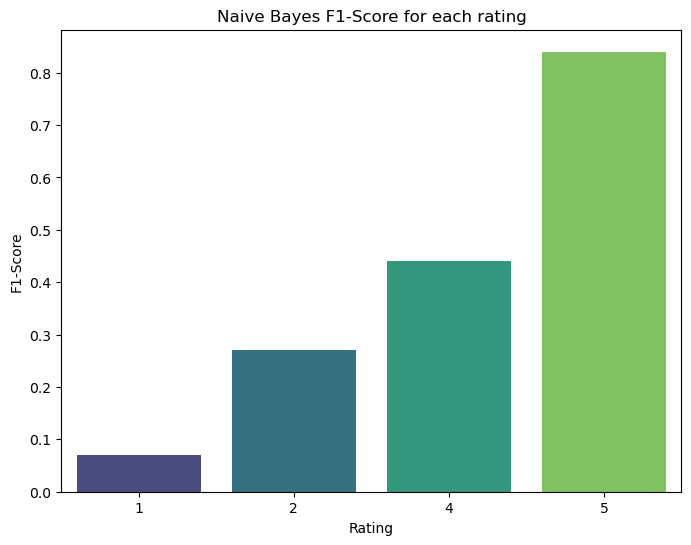

In [21]:
# F1-score data
ratings = ['1', '2', '4', '5']
f1_scores = [0.07, 0.27, 0.44, 0.84]

# Create a dictionary to store the data
f1_data = {'Rates': ratings, 'F1-Score': f1_scores}

# Convert the dictionary to a DataFrame
f1_df = pd.DataFrame(f1_data)

# Plot the bar chart using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Rates', y='F1-Score', data = f1_df, palette='viridis')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('F1-Score')
plt.title('Naive Bayes F1-Score for each rating')

# Show the plot
plt.show()

### e. Naive Bayes model testing with data

#### Test case 1

Let's test with the positive review

Review: line 6 - "I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops."

Rating: 5

In [22]:
#Load the review line #6 from dataset
rating_positive=df['Review Text'][6]
rating_positive

'I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.'

In [23]:
#Let the model predict and the reuslt should be 5
rating_positive_transformed = dt_transformer.transform([rating_positive])
display(nb.predict(rating_positive_transformed)[0])

5

#### Test case 2

Let's test another positive review

Review: line 21 - "I'm upset because for the price of the dress, i thought it was embroidered! no, that is a print on the fabric. i think i cried a little when i opened the box. it is still ver pretty. i would say it is true to size, it is a tad bit big on me, but i am very tiny, but i can still get away with it. the color is vibrant. the style is unique. skirt portion is pretty poofy. i keep going back and forth on it mainly because of the price, although the quality is definitely there. except i wish it were emb"

Rating: 4

In [24]:
#Load the review line #21 from dataset
rating_positive_case2 = df['Review Text'][21]
rating_positive_case2

"I'm upset because for the price of the dress, i thought it was embroidered! no, that is a print on the fabric. i think i cried a little when i opened the box. it is still ver pretty. i would say it is true to size, it is a tad bit big on me, but i am very tiny, but i can still get away with it. the color is vibrant. the style is unique. skirt portion is pretty poofy. i keep going back and forth on it mainly because of the price, although the quality is definitely there. except i wish it were emb"

In [25]:
#Let the model predict and the reuslt should be 4
rating_positive_transformed = dt_transformer.transform([rating_positive_case2])
display(nb.predict(rating_positive_transformed)[0])

4

#### Test case 3

Let's test a negative review

Review: line 61 - "3 tags sewn in, 2 small (about 1'' long) and 1 huge (about 2'' x 3''). very itchy so i cut them out. then the thread left behind was plasticy and even more itchy! how can you make an intimates item with such itchy tags? not comfortable at all! also - i love bralettes and wear them all the time including to work. i am a b cup. however, this one is so thin and flimsy that it gives no support even to a b cup - so for me this would only be a lounging bralette - if it wasn't so itchy!"

Rating: 1

In [26]:
#Load the review line #61 from dataset
rating_negative = df['Review Text'][61]
rating_negative

"3 tags sewn in, 2 small (about 1'' long) and 1 huge (about 2'' x 3''). very itchy so i cut them out. then the thread left behind was plasticy and even more itchy! how can you make an intimates item with such itchy tags? not comfortable at all! also - i love bralettes and wear them all the time including to work. i am a b cup. however, this one is so thin and flimsy that it gives no support even to a b cup - so for me this would only be a lounging bralette - if it wasn't so itchy!"

In [28]:
#Let the model predict and the reuslt should be 1
rating_negative_transformed = dt_transformer.transform([rating_negative])
display(nb.predict(rating_negative_transformed)[0])

2

## V. Working with ANN model to predict recommendation from the provided review

In [29]:
data = df.drop(['Unnamed: 0', 'Title', 'Clothing ID', 'Positive Feedback Count'], axis=1)
data.head()

,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Review Length
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate,Intimates,53
1,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses,303
2,60,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,500
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants,124
4,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses,192


In [30]:
# Checking for the missing values
count_NaN = data.isna().sum()
count_NaN

Age                 0
Review Text         0
Rating              0
Recommended IND     0
Division Name      14
Department Name    14
Class Name         14
Review Length       0
dtype: int64

In [31]:
# Dropping the missing values in the rows
data = data.dropna(subset=['Review Text', 'Division Name', 'Department Name', 'Class Name'], axis=0)
data = data.reset_index(drop=True)

# Checking for the missing values after the drops
count_NaN_updated = data.isna().sum()
count_NaN_updated

Age                0
Review Text        0
Rating             0
Recommended IND    0
Division Name      0
Department Name    0
Class Name         0
Review Length      0
dtype: int64

### a. Data preprocessing

In [32]:
# Lower Character all the Texts
data['Review Text'] = data['Review Text'].str.lower()

# Removing Punctuations and Numbers from the Text
def remove_punctuations_numbers(inputs):
    return re.sub(r'[^a-zA-Z]', ' ', inputs)

data['Review Text'] = data['Review Text'].apply(remove_punctuations_numbers)

#Tokenizing with NLTK to clean the dataset for better model training
def tokenization(inputs):
    return word_tokenize(inputs)


data['text_tokenized'] = data['Review Text'].apply(tokenization)

#Stop words removal
stop_words = set(stopwords.words('english'))
stop_words.remove('not')

def stopwords_remove(inputs):
    return [k for k in inputs if k not in stop_words]

data['text_stop'] = data['text_tokenized'].apply(stopwords_remove)

# Removing Words less than length 2
def remove_less_than_2(inputs): 
    return [j for j in inputs if len(j) > 2]

data['final'] = data['text_stop'].apply(remove_less_than_2)

# Joining Tokens into Sentences
data['final'] = data['final'].str.join(' ')
data['final'].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store gla...
2    high hopes dress really wanted work initially ...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: final, dtype: object

### b. Training and test split

In [36]:
from sklearn.model_selection import train_test_split

A = data['final']
b = data['Recommended IND']

# Train-Test-Validation Split
a, A_test, b, b_test = train_test_split(A, b, test_size=0.3, random_state=13)
A_train, A_val, b_train, b_val = train_test_split(a, b, test_size=0.2, random_state=13)

### c. Tokenizing with Tensorflow

In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import GlobalAvgPool1D
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

num_words = 10000
tokenizer = Tokenizer(num_words=num_words, oov_token='<OOV>')
tokenizer.fit_on_texts(A_train)

Tokenized_train = tokenizer.texts_to_sequences(A_train)
Tokenized_val = tokenizer.texts_to_sequences(A_val)

#__Validate data__
print('Non-tokenized Version: ', A_train[2])
print('Tokenized Version: ', tokenizer.texts_to_sequences([A_train[2]]))
print('--'*20)
print('Non-tokenized Version: ', A_train[80])
print('Tokenized Version: ', tokenizer.texts_to_sequences([A_train[80]]))


Non-tokenized Version:  high hopes dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layers imo major design flaw net layer sewn directly zipper
Tokenized Version:  [[106, 901, 2, 16, 119, 52, 996, 18, 46, 13, 157, 5, 143, 7988, 13, 13, 546, 63, 3, 617, 1947, 46, 47, 161, 6, 531, 25, 7, 164, 99, 531, 84, 352, 373, 563, 337, 3763, 914, 1630, 1493, 80, 1383, 3763, 352, 609, 2817, 354]]
----------------------------------------
Non-tokenized Version:  usually petite since dress not come petites tried fit lbs dress hit knee hemmed bit not overwhelming dress looks stunning great vibrant color dark hair makes classic elegant dress look contemporary stylish tried store salesperson others happen see raved told grab glad plan wear spring daughte
Tokenized Version:  [[55, 46, 151, 2, 3, 366, 821, 54, 7, 58, 2, 288, 28

In [38]:
Padded_train = pad_sequences(Tokenized_train, maxlen=100, padding='pre')
Padded_val = pad_sequences(Tokenized_val, maxlen=100, padding='pre')

In [39]:
# Creating the Model
model = Sequential()

model.add(Embedding(num_words, 32, input_length=100))
model.add(Dropout(0.4))

model.add(GlobalAvgPool1D())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

#EarlyStopping callback
earlystop = EarlyStopping(patience = 6)
callbacks_list = [earlystop]

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           320000    
                                                                 
 dropout (Dropout)           (None, 100, 32)           0         
                                                                 
 global_average_pooling1d (  (None, 32)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 320033 (1.22 MB)
Trainable params: 320033 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

Epoch 1/50
411/411 [==============================] - 2s 4ms/step - loss: 0.5032 - accuracy: 0.8140 - val_loss: 0.4347 - val_accuracy: 0.8348
Epoch 2/50
411/411 [==============================] - 1s 3ms/step - loss: 0.4525 - accuracy: 0.8205 - val_loss: 0.4184 - val_accuracy: 0.8348
Epoch 3/50
411/411 [==============================] - 1s 3ms/step - loss: 0.4326 - accuracy: 0.8205 - val_loss: 0.3964 - val_accuracy: 0.8348
Epoch 4/50
411/411 [==============================] - 1s 3ms/step - loss: 0.4037 - accuracy: 0.8206 - val_loss: 0.3686 - val_accuracy: 0.8348
Epoch 5/50
411/411 [==============================] - 1s 3ms/step - loss: 0.3697 - accuracy: 0.8258 - val_loss: 0.3371 - val_accuracy: 0.8378
Epoch 6/50
411/411 [==============================] - 1s 3ms/step - loss: 0.3363 - accuracy: 0.8418 - val_loss: 0.3107 - val_accuracy: 0.8536
Epoch 7/50
411/411 [==============================] - 1s 3ms/step - loss: 0.3080 - accuracy: 0.8596 - val_loss: 0.2911 - val_accuracy: 0.8722
Epoch 

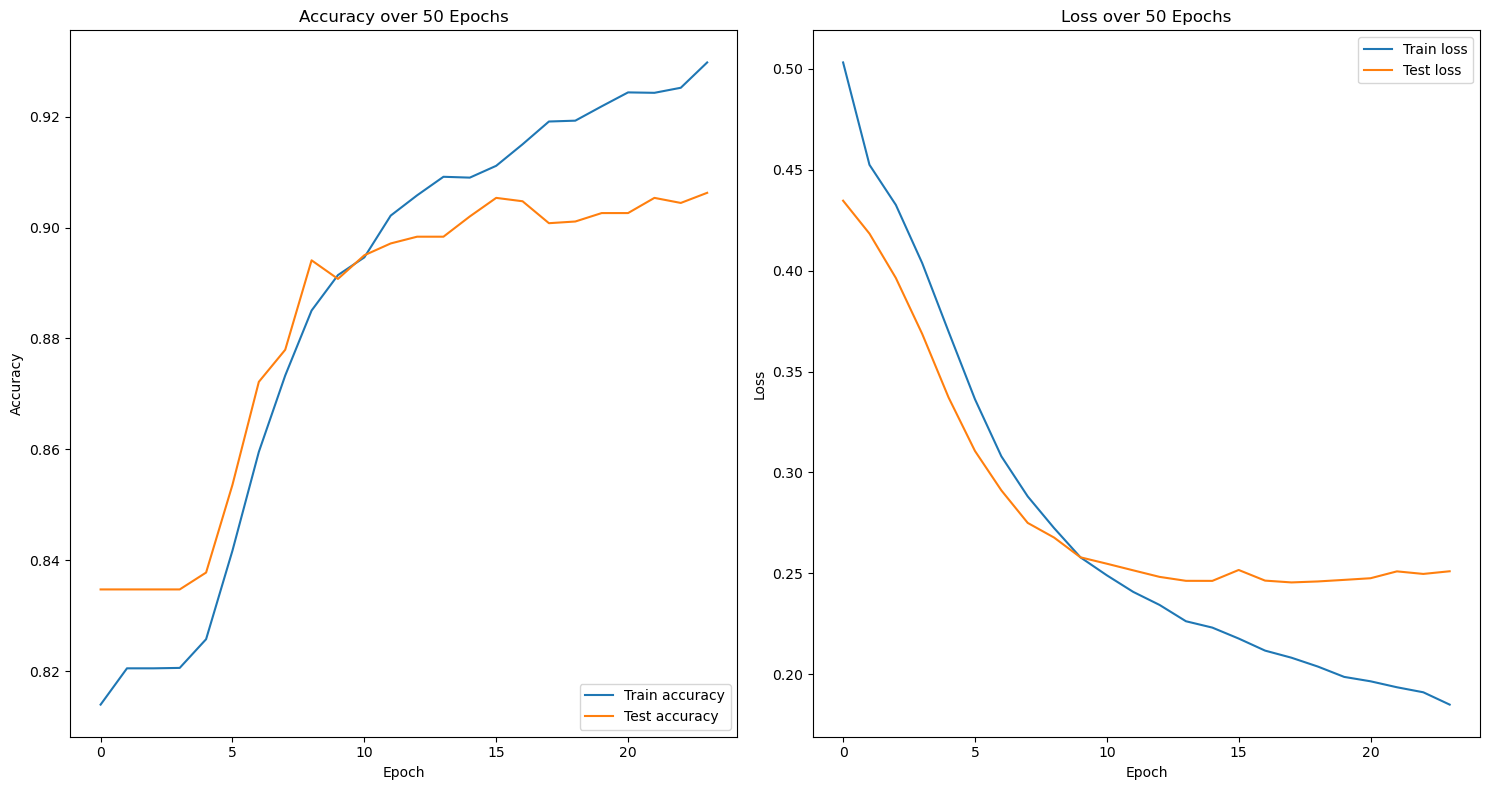

In [40]:
# Training the Model
epochs = 50
history = model.fit(Padded_train, b_train, epochs=epochs, validation_data=(Padded_val, b_val), callbacks=[earlystop], batch_size=32)

# Visualize training history
plt.figure(figsize=(15, 8))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy over 50 Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train accuracy', 'Test accuracy'], loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss over 50 Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train loss', 'Test loss'], loc='upper right')

plt.tight_layout()
plt.show()

### d. Testing data preparation

In [41]:
A_test = A_test.apply(tokenization)
A_test = A_test.apply(stopwords_remove)
A_test = A_test.str.join(' ')

A_test.head()

3732     received mail looked beautiful zipper broken l...
22669    regarding product high quality materials overa...
3547     writing warn others run small ordered usual sm...
6775     know opposite problem reviewers tried regular ...
15556    purchased dusty rose thought picture represent...
Name: final, dtype: object

In [42]:
Tokenized_test = tokenizer.texts_to_sequences(A_test)
Padded_test = pad_sequences(Tokenized_test, maxlen=100, padding='pre')

test_evaluate = model.evaluate(Padded_test, b_test)

221/221 [==============================] - 0s 820us/step - loss: 0.2733 - accuracy: 0.8904


### e. Evaluation Metrics of the LSTM Model

In [43]:
pred_train_lstm = model.predict(Padded_train)
pred_test_lstm = model.predict(Padded_test)

for i, x in enumerate(pred_test_lstm):
    if 0 <= x < 0.49:
        pred_test_lstm[i] = 0
    else:
        pred_test_lstm[i] = 1

for i, x in enumerate(pred_train_lstm):
    if 0 <= x < 0.49:
        pred_train_lstm[i] = 0
    else:
        pred_train_lstm[i] = 1

221/221 [==============================] - 0s 776us/step


In [44]:
from keras.layers import LSTM

# Accuracy
train_acc_lstm = round(accuracy_score(b_train, pred_train_lstm) * 100, 2)
print('Train Accuracy of the LSTM: %', train_acc_lstm)
test_acc_lstm = round(accuracy_score(b_test, pred_test_lstm) * 100, 2)
print('Test Accuracy of the LSTM: %', test_acc_lstm)
print('--' * 20)

# Precision
train_precision_lstm = round(precision_score(b_train, pred_train_lstm) * 100, 2)
print('Train Precision of the LSTM: %', train_precision_lstm)
precision_lstm = round(precision_score(b_test, pred_test_lstm) * 100, 2)
print('Test Precision of the LSTM: %', precision_lstm)
print('--' * 20)

# Recall
train_recall_lstm = round(recall_score(b_train, pred_train_lstm) * 100, 2)
print('Train Recall of the LSTM: %', train_recall_lstm)
recall_lstm = round(recall_score(b_test, pred_test_lstm) * 100, 2)
print('Test Recall of the LSTM: %', recall_lstm)
print('--' * 20)

# F1_score
train_f1_lstm = round(f1_score(b_train, pred_train_lstm) * 100, 2)
print('Train F1_score of the LSTM: %', train_f1_lstm)
f1_lstm = round(f1_score(b_test, pred_test_lstm) * 100, 2)
print('Test F1_score of the LSTM: %', f1_lstm)

Train Accuracy of the LSTM: % 93.25
Test Accuracy of the LSTM: % 88.99
----------------------------------------
Train Precision of the LSTM: % 94.25
Test Precision of the LSTM: % 91.09
----------------------------------------
Train Recall of the LSTM: % 97.74
Test Recall of the LSTM: % 95.96
----------------------------------------
Train F1_score of the LSTM: % 95.96
Test F1_score of the LSTM: % 93.46


### f. Try to predict recommendation from review text 

In [45]:
#predict_recommendation function
def predict_recommendation(input_text):
    input_text = input_text.lower()
    input_text = re.sub(r'[^a-zA-Z]', ' ', input_text)
    input_text = tokenization(input_text)
    input_text = stopwords_remove(input_text)
    input_text = ' '.join(input_text)
    input_text = tokenizer.texts_to_sequences([input_text])
    input_text = pad_sequences(input_text, maxlen = 100, padding = 'pre')
    input_text = model.predict(input_text)
    if input_text >= 0.5:
        input_text = f'Recommended with %{round(float(input_text*100), 2)}'
    else:
        input_text = f'Not Recommended with %{round(float(input_text*100), 2)}'

    return print(input_text)

#### Test cases

In [46]:
predict_recommendation("The clothes are such poor quality and look nothing like they do on the website. I order 2 packages of fast fashion a year just as a treat, and I sorely regret buying from here. Fabrics are cheaper than what they charge, their seems to be no thought of sizing consitency and so on")

1/1 [==============================] - 0s 19ms/step
Not Recommended with %25.92


In [47]:
predict_recommendation("I should've checked reviews before ordering... each item they sent was much worse quality in person than how it appeared online, and one of the dresses looked NOTHING in person what they said it was! I even double-checked to make sure they didn't accidentally send me the wrong item. see photos below.")

1/1 [==============================] - 0s 15ms/step
Not Recommended with %4.18


In [48]:
predict_recommendation("I have no complaints whatsoever, from ordering to getting my goods were excellent , down to the garments themselves, was as good as you see them on the website, I have shopped on here a few times and not disappointed at all, the only problem I have is that some trousers are a bit slim on leg and because I am a below knee amputee I have difficulty getting the right fit, otherwise very happy indeed.")

1/1 [==============================] - 0s 14ms/step
Recommended with %85.65


In [49]:
predict_recommendation("I really love this dress. I ordered a large and it fits perfectly. There’s about 1/2” that touches the ground, which could easily be fixed with a pair of wedges. The cut is flattering, flowing and hides my mom belly. I am bottom heavy and this dress accommodated everything just fine. It shows just a bit of cleavage and just a bit of knee. The fabric doesn’t seem to need a slip. It gets a good breeze and looks pretty when you walk because of the ruffles. The color matched the picture exactly. If you’re considering this dress, I say, yes, buy it!")

1/1 [==============================] - 0s 14ms/step
Recommended with %99.86


<center>__End of document__</center>